In [21]:
#necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# here header = none means that the that the dataset has no name to first row
#and then we define it
df = pd.read_csv('wine_data.csv' , header = None , usecols = [ 0, 1 , 2 ] )
df.columns = [ 'CLASS LABEL' , 'ALCOHOL' , 'MALIC ACID' ]
df

,CLASS LABEL,ALCOHOL,MALIC ACID
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='ALCOHOL', ylabel='Density'>

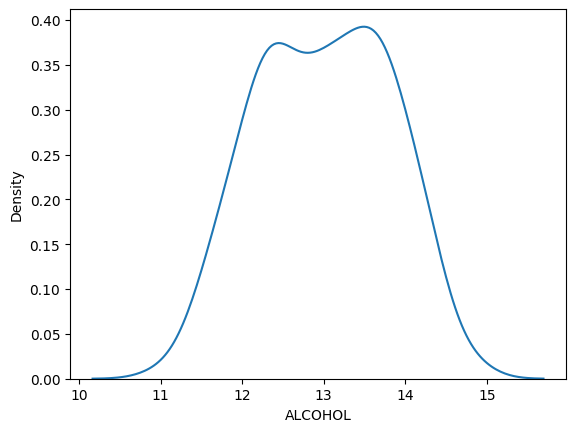

In [4]:
sns.kdeplot(df['ALCOHOL'])
# here density is the  probabibity density

<Axes: xlabel='MALIC ACID', ylabel='Density'>

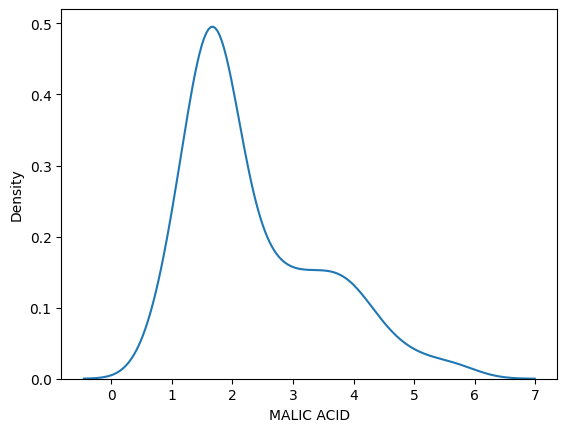

In [5]:
sns.kdeplot(df['MALIC ACID'])

<Axes: xlabel='ALCOHOL', ylabel='MALIC ACID'>

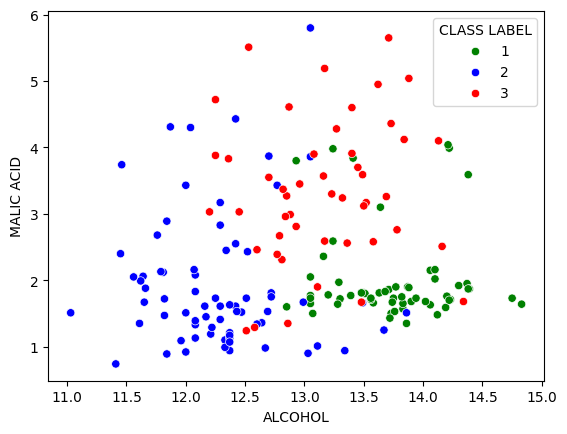

In [6]:
color_dict = {3:'red',1:'green',2:'blue'}
#hue	- Decides which column will be used to assign colors.
#palette - 	Defines what colors are used for different hue values.
#here class label(col) is plotted as colors
sns.scatterplot(x=df['ALCOHOL'], y=df['MALIC ACID'] , hue = df['CLASS LABEL'] , palette = color_dict)

NOW THE TRAIN TEST SPLIT

In [7]:
from sklearn.model_selection import train_test_split
#dropped the last col for x and stored itin  y , what to drop axis = 1(i.e col) for class label
x_train , x_test , y_train , y_test = train_test_split( df.drop('CLASS LABEL' , axis = 1) , df['CLASS LABEL'] , test_size = 0.3 , random_state = 0 )
y_train.shape , x_train.shape , x_test.shape

((124,), (124, 2), (54, 2))

In [8]:
# NORMALISATION STARTS
from sklearn.preprocessing import MinMaxScaler
sc  =  MinMaxScaler()
#fit to calc the xmin and xmax
sc.fit(x_train)
#apply the transformation to both train&test of x
x_train_scaled = sc.transform(x_train)
x_test_scaled = sc.transform(x_test)

x_train_scaled

array([[0.72043011, 0.20378151],
       [0.31989247, 0.08403361],
       [0.60215054, 0.71218487],
       [0.57258065, 0.56302521],
       [0.76075269, 0.1302521 ],
       [0.48924731, 0.5       ],
       [0.75537634, 0.67857143],
       [0.61021505, 0.17436975],
       [0.54301075, 0.62394958],
       [0.39784946, 0.07352941],
       [0.33870968, 0.1092437 ],
       [0.46774194, 0.53361345],
       [0.5188172 , 0.53781513],
       [0.70967742, 0.07563025],
       [0.57258065, 0.30882353],
       [0.36021505, 0.0105042 ],
       [0.38709677, 0.13235294],
       [0.20967742, 0.25840336],
       [0.59408602, 0.64915966],
       [0.82526882, 0.26680672],
       [0.15591398, 0.09663866],
       [0.52688172, 0.16386555],
       [0.46774194, 0.31512605],
       [0.65860215, 0.16386555],
       [0.1155914 , 0.5987395 ],
       [0.27956989, 0.26680672],
       [0.21236559, 0.12184874],
       [0.65053763, 0.59033613],
       [0.31451613, 0.44957983],
       [0.54301075, 0.17647059],
       [0.

In [9]:
# so to change the array format  as given by the sklearn convert it to readable format
# using the pandas dataframe(caps) and also give name to cols
x_train_scaled = pd.DataFrame(x_train_scaled , columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled , columns = x_test.columns)

In [10]:
 x_test_scaled

,ALCOHOL,MALIC ACID
0,0.728495,0.163866
1,0.473118,0.373950
2,0.360215,0.050420
3,0.680108,0.176471
4,0.543011,1.031513
5,0.142473,0.243697
6,0.814516,0.264706
7,0.357527,0.617647
8,0.327957,0.176471
9,0.282258,0.197479


In [11]:
#the first value overall stastics
np.round(x_train.describe() , 1)

,ALCOHOL,MALIC ACID
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [12]:
#compare the both old new one to normalised method
#and see the min and max which is of imp(0,1)
np.round(x_train_scaled.describe() , 1)

,ALCOHOL,MALIC ACID
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


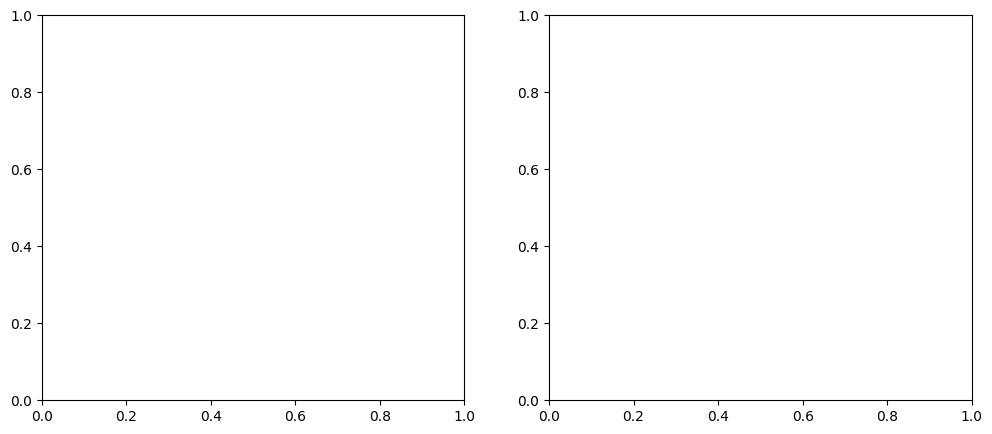

In [13]:
#THEN COMES THE EFFECT OF SCALING
fig , (ax1 , ax2 ) = plt.subplots( ncols = 2 , figsize = (12,5) )

In [14]:
ax1.scatter(x_train['ALCOHOL'] , x_train['MALIC ACID'] )
ax1.set_title('before scaling')

Text(0.5, 1.0, 'before scaling')

In [15]:
ax2.scatter(x_train['ALCOHOL'] , x_train['MALIC ACID'] )
ax2.set_title('after scaling')

Text(0.5, 1.0, 'after scaling')

In [16]:
plt.show()

Text(0.5, 1.0, 'after scaling')

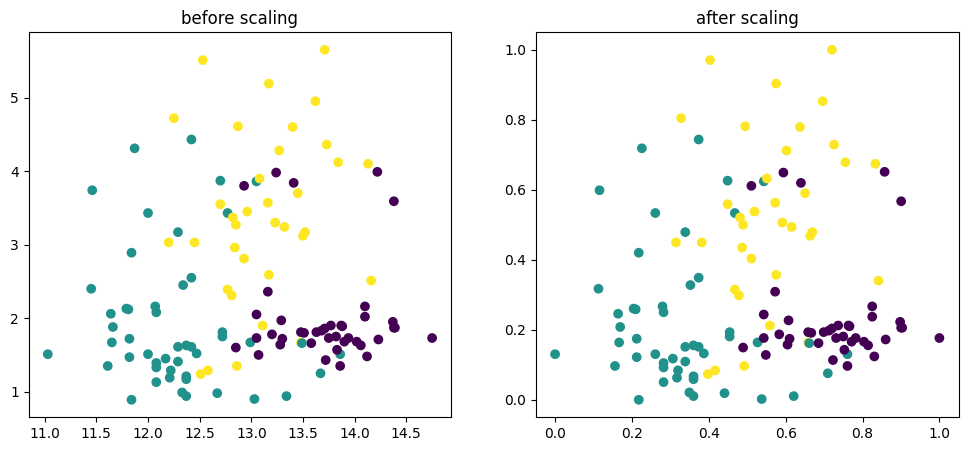

In [17]:
fig , (ax1 , ax2 ) = plt.subplots( ncols = 2 , figsize = (12,5) )
# In Matplotlib's scatter() function, the c parameter is used to set colors for each data
# point based on a given array.
ax1.scatter(x_train['ALCOHOL'] , x_train['MALIC ACID'] , c = y_train)
ax1.set_title('before scaling')
#y_train means the class label(col)
ax2.scatter(x_train_scaled['ALCOHOL'] , x_train_scaled['MALIC ACID'] , c = y_train )
ax2.set_title('after scaling')
# you can't seee there's much  difference  in shape

<Axes: xlabel='ALCOHOL', ylabel='Density'>

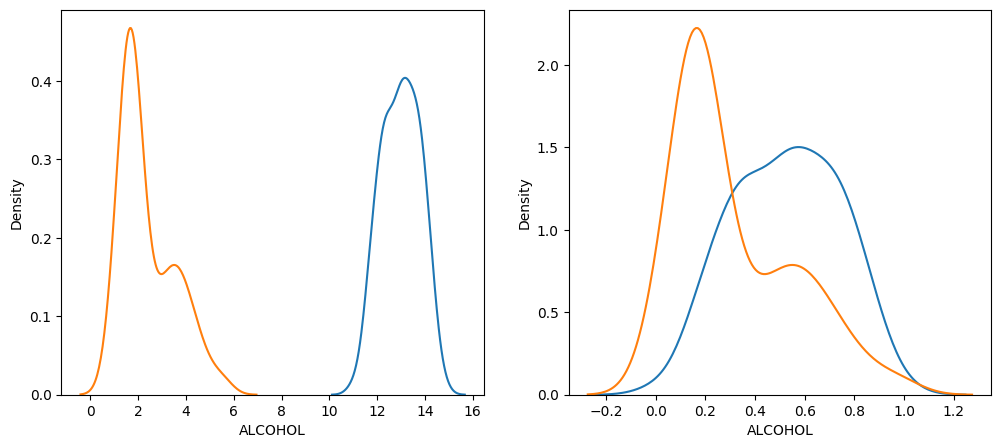

In [18]:
#now using the seaborn library
figure , (axes1 , axes2) = plt.subplots(ncols = 2 , figsize = ( 12  ,5 ) )
axes1.set_title = "before scaling"

sns.kdeplot( x_train['ALCOHOL'] , ax = axes1  )
sns.kdeplot( x_train['MALIC ACID'] , ax = axes1 )

axes2.set_title = "after scaling"
sns.kdeplot( x_train_scaled['ALCOHOL'] , ax = axes2  )
sns.kdeplot( x_train_scaled['MALIC ACID'] , ax = axes2 )
#now both are on the same scale


NOW INDIVIDUALLY TESTING THE SCALING EFFECTS

<Axes: xlabel='ALCOHOL', ylabel='Density'>

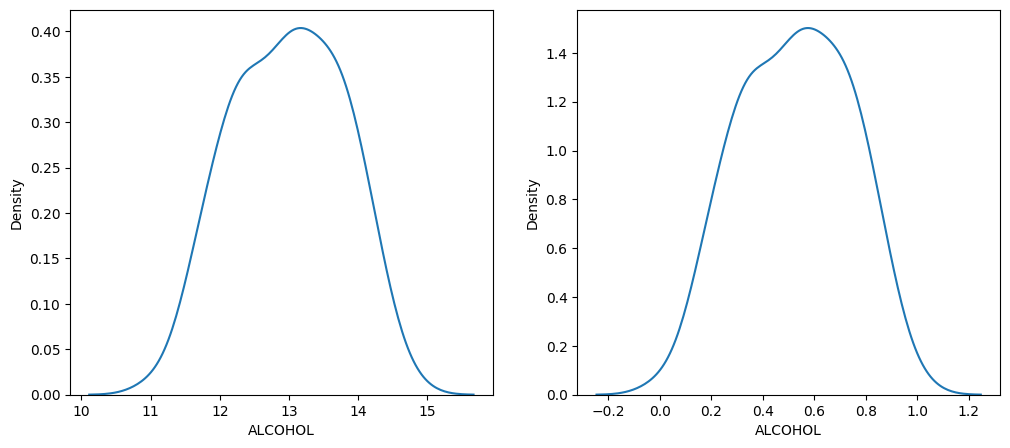

In [19]:
figure , (axes1 , axes2) = plt.subplots(ncols = 2 , figsize = ( 12  , 5 ) )
axes1.set_title = "before alcohol scaling"
sns.kdeplot( x_train['ALCOHOL'] , ax = axes1  )

axes1.set_title = "after  alcohol scaling"
sns.kdeplot( x_train_scaled['ALCOHOL'] , ax = axes2  )
#no change apart from the scale

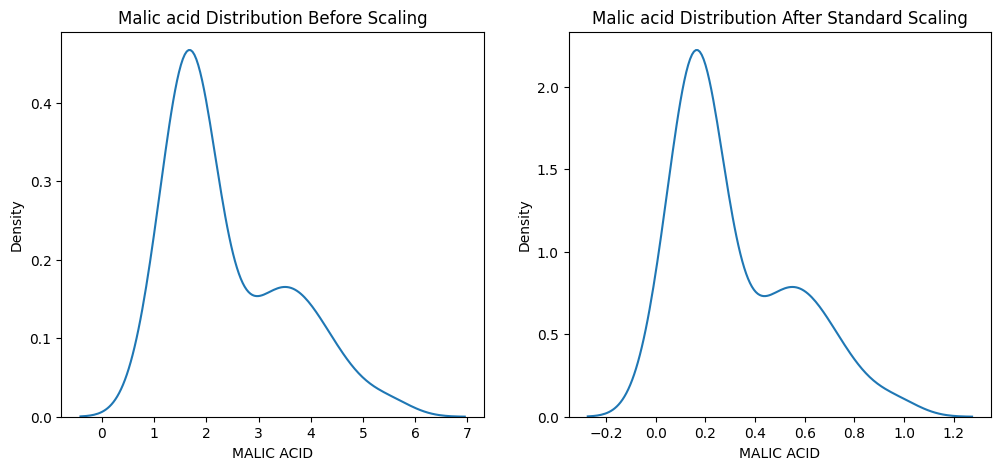

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(x_train['MALIC ACID'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['MALIC ACID'], ax=ax2)
plt.show()